# Project

In this project, the aim is to build a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, the label or target variable will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, do we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.

# MARK SILAS

# Exploratory Data Analysis

In [2]:
#importing necessary libray for data analysis and visualisation
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Read csv
data = pd.read_csv("churn.csv")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [4]:
#Checking for shape of data
data.shape

(3333, 11)

In [5]:
#viewing columns of data
data.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [6]:
#Viewing the summary descriptive statistics
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [7]:
#Checking data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [8]:
#Cheking for total of missing values
data.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [9]:
#Checking for duplicate values
data.duplicated().sum()

0

In [10]:
#Value counts for churn column
data['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

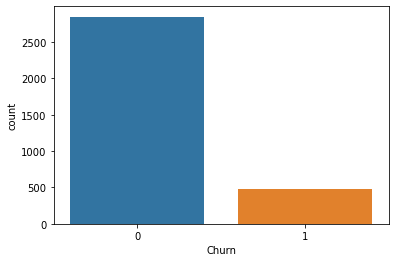

In [11]:
#Visualising the target variable(Churn)
ax = sns.countplot(x="Churn", data=data)

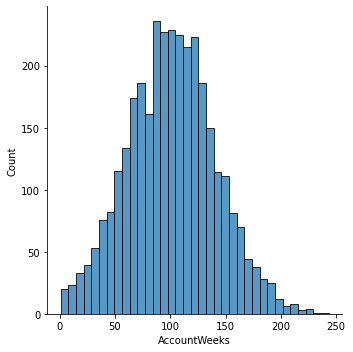

In [12]:
#Visualising AccountWeeks column
sns.displot(data=data, x="AccountWeeks")

In [13]:
#Value count for Contract renewal
data['ContractRenewal'].value_counts()

1    3010
0     323
Name: ContractRenewal, dtype: int64

In [14]:
#Value counts for DataPlan column
data['DataPlan'].value_counts()

0    2411
1     922
Name: DataPlan, dtype: int64

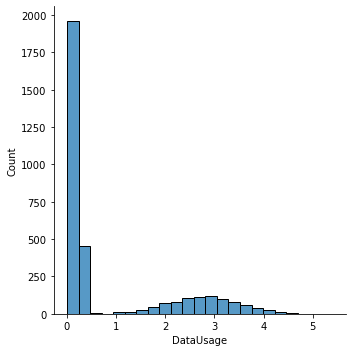

In [15]:
#Visualising DataUSage column
sns.displot(data=data, x="DataUsage")

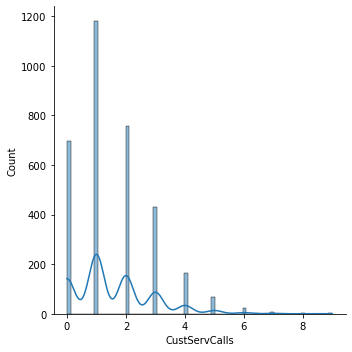

In [16]:
#Visualising CustServCalls column
sns.displot(data=data, x="CustServCalls", kde=True)

In [17]:
#Value counts for DayMins
pd.qcut(data['DayMins'],5).value_counts()

(165.68, 194.0]     668
(224.76, 350.8]     667
(-0.001, 134.74]    667
(134.74, 165.68]    666
(194.0, 224.76]     665
Name: DayMins, dtype: int64

In [18]:
#Value counts for DayCalls
pd.qcut(data['DayCalls'],5).value_counts()

(-0.001, 84.0]    699
(84.0, 96.0]      695
(96.0, 106.0]     662
(117.0, 165.0]    649
(106.0, 117.0]    628
Name: DayCalls, dtype: int64

In [19]:
#Value count for MonthlyCharge
pd.qcut(data['MonthlyCharge'],5).value_counts()

(42.2, 50.0]      706
(57.02, 70.0]     673
(13.999, 42.2]    668
(70.0, 111.3]     660
(50.0, 57.02]     626
Name: MonthlyCharge, dtype: int64

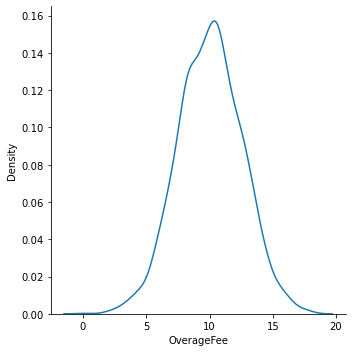

In [20]:
#Visualising OverageFee column
sns.displot(data=data, x="OverageFee", kind="kde")

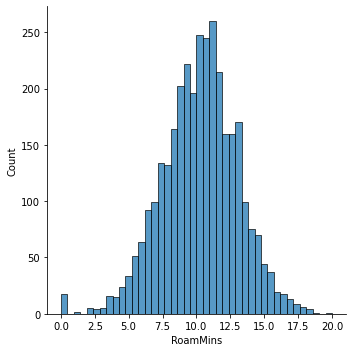

In [21]:
#Visualising RoamMins column
sns.displot(data=data, x="RoamMins")

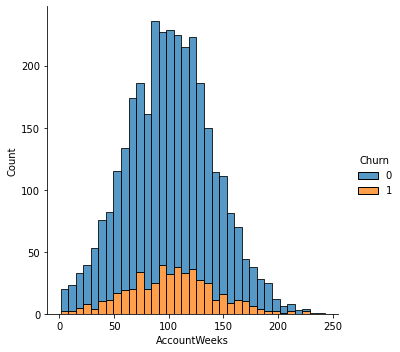

In [22]:
#Visualisation for Churn w.r.t AccountWeeks
sns.displot(data=data, x="AccountWeeks", hue="Churn", multiple="stack")

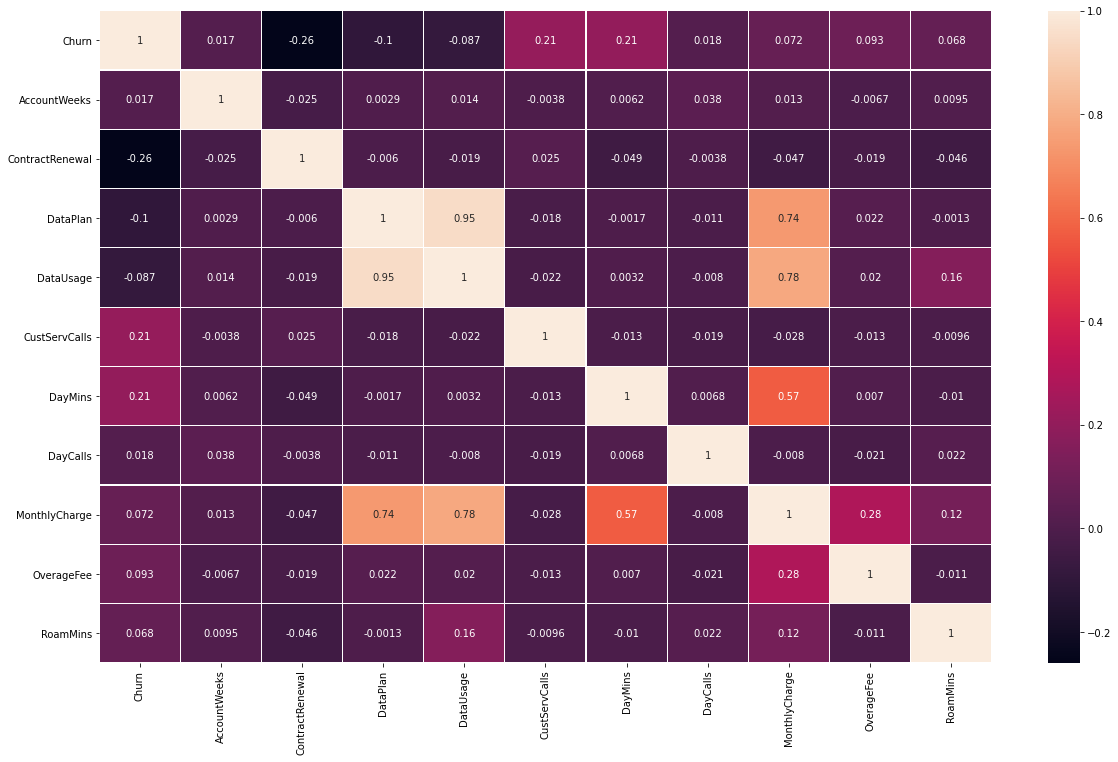

In [23]:
#checking the correlation between features
sns.heatmap(data.corr(),annot=True,linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [24]:
#Applying Z-score to find unusual data point values such as outliers
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
z

array([[0.41167182, 0.67648946, 0.32758048, ..., 1.99072703, 0.0715836 ,
        0.08500823],
       [0.41167182, 0.14906505, 0.32758048, ..., 1.56451025, 0.10708191,
        1.24048169],
       [0.41167182, 0.9025285 , 0.32758048, ..., 0.26213309, 1.57434567,
        0.70312091],
       ...,
       [0.41167182, 1.83505538, 0.32758048, ..., 0.01858065, 1.73094204,
        1.3837779 ],
       [0.41167182, 2.08295458, 3.05268496, ..., 0.38390932, 0.81704825,
        1.87621082],
       [0.41167182, 0.67974475, 0.32758048, ..., 2.66049626, 1.28129669,
        1.24048169]])

In [25]:
#Checking for outliers(outliers always have z-scores  above 3)
outliers = list(set(np.where(z > 3)[0]))
len(outliers)

414

In [26]:
#Removing Outliers
Data = data[(z < 3).all(axis=1)]
Data

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
...,...,...,...,...,...,...,...,...,...,...,...
3327,0,79,1,0,0.00,2,134.7,98,40.0,9.49,11.8
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1


In [27]:
#Instantiating a threadpool to handle accuracy score and classification report
from concurrent.futures import ThreadPoolExecutor
from sklearn.metrics import classification_report, confusion_matrix

def model_testing(md):
    with ThreadPoolExecutor(max_workers=2) as executor:
        executor.submit(md.fit, X_train, y_train)
    print("Training Accuracy: ", md.score(X_train, y_train), '\n')
    print("Testing Accuracy: ", md.score(X_test, y_test), '\n')
    print(classification_report(y_test, md.predict(X_test)))
    return md.predict(data.drop(columns=['Churn']))

# MACHINE LEARNING MODEL

# Applying Various Classification Model

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#Setting your columns into attributes and label
X = Data[['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']]
y = Data['Churn']

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_sc = scaler.transform(X)
X_sc 

array([[ 0.69196206,  0.        ,  1.63312138, ...,  2.05929645,
        -0.068431  , -0.0941079 ],
       [ 0.1624696 ,  0.        ,  1.63312138, ...,  1.62161451,
        -0.10450144,  1.29308134],
       [ 0.9188874 ,  0.        , -0.61232436, ..., -0.25416527,
        -1.59541298,  0.73070732],
       ...,
       [-0.82087355,  0.        , -0.61232436, ...,  0.0209491 ,
        -0.95015288, -0.2440743 ],
       [-1.82943062,  0.        , -0.61232436, ..., -0.0040613 ,
         1.76314581,  1.44304774],
       [-0.66958999,  0.        ,  1.63312138, ...,  2.74708237,
         1.30625356,  1.29308134]])

In [34]:
#Importing training and testsing, standadisation and pipeline module 
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_sc,y, test_size=0.2, random_state=42)

In [35]:
#Creating the object of the models model 
log = LogisticRegression(solver="liblinear", C=10, random_state=42, n_jobs=-1).fit(X_train, y_train)
dct= tree.DecisionTreeClassifier(max_depth=4 , random_state=42).fit(X_train, y_train)
svc = SVC(C=10, probability=True).fit(X_train, y_train)
rfc = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
gbc = GradientBoostingClassifier().fit(X_train, y_train)
gsc = GridSearchCV(estimator = log, param_grid  = {"C": [0.1,0.01,0.001,10,1]}, cv= 5).fit(X_train, y_train)

In [36]:
X_train.shape

(2335, 10)

In [37]:
X_test.shape

(584, 10)

In [38]:
y_test.shape

(584,)

In [39]:
#Shape of training label
y_train.shape

(2335,)

In [40]:
def trainer(X_train, y_train,):
    classifiers = [log, dct, svc, rfc, knn, gbc]
    for classifier in classifiers:
        metrics = model_testing(classifier)
        print(metrics)
        print(classifier)

trainer(X_train, y_train)

Training Accuracy:  0.8942184154175589 

Testing Accuracy:  0.9075342465753424 

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       527
           1       0.64      0.12      0.21        57

    accuracy                           0.91       584
   macro avg       0.77      0.56      0.58       584
weighted avg       0.89      0.91      0.88       584

[1 1 1 ... 1 1 1]
LogisticRegression(C=10, n_jobs=-1, random_state=42, solver='liblinear')
Training Accuracy:  0.9481798715203427 

Testing Accuracy:  0.9417808219178082 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       527
           1       0.76      0.60      0.67        57

    accuracy                           0.94       584
   macro avg       0.86      0.79      0.82       584
weighted avg       0.94      0.94      0.94       584

[1 1 1 ... 1 1 1]
DecisionTreeClassifier(max_depth=4, random_state=42)
Training Accuracy:  0.

# Logistcis Regression

In [41]:
#Predicting the probabilities of training attributes
log.predict_proba(X_train)

array([[0.76930346, 0.23069654],
       [0.9895309 , 0.0104691 ],
       [0.94266286, 0.05733714],
       ...,
       [0.98297721, 0.01702279],
       [0.97998195, 0.02001805],
       [0.62495762, 0.37504238]])

In [42]:
#Confusion matrix
confusion_matrix(y_train, log.predict(X_train))

array([[2053,   18],
       [ 229,   35]], dtype=int64)

<AxesSubplot:>

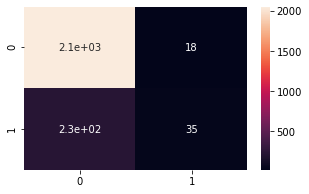

In [43]:
#Visulaising confusion matrix
cm = confusion_matrix(y_train, log.predict(X_train))
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True)

In [ ]:
#Area under the roc curve measures the performance of the model. ROC curve above 0.50 shows good performace.
from sklearn.metrics import roc_curve, auc

y_pred_prop = log.predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prop)
roc_auc_log = auc(fpr_log, tpr_log)

sns.set_style("white")
plt.figure(figsize=(5, 3))
plt.plot(fpr_log, tpr_log, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=18,labelpad =10)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Receiver Operating Characteristic',fontsize=22).set_position([.5, 1.02])
plt.legend(loc="lower right",fontsize=13)
plt.show()

In [ ]:
#Print best parameter after tuning 
gsc.best_params_

In [ ]:
#Print best score after tunning 
gsc.best_score_

In [ ]:
#Score of test data after tunning
gsc.score(X_test, y_test)

# Decision Tree

In [ ]:
dct.predict_proba(X_train)

In [ ]:
confusion_matrix(y_train, dct.predict(X_train))

In [ ]:
c_matrix = confusion_matrix(y_train, dct.predict(X_train))
plt.figure(figsize=(5,3))
sns.heatmap(c_matrix, annot=True)

# Support Vector

In [ ]:
svc.predict_proba(X_train)

In [ ]:
confusion_matrix(y_train, svc.predict(X_train))

In [ ]:
con_matrix = confusion_matrix(y_train, svc.predict(X_train))
plt.figure(figsize=(5, 3))
sns.heatmap(con_matrix, annot=True)

# Random Forest

In [ ]:
rfc.predict_proba(X_train)

In [ ]:
confusion_matrix(y_train, rfc.predict(X_train))

In [ ]:
con_matrix = confusion_matrix(y_train, rfc.predict(X_train))
plt.figure(figsize=(5, 3))
sns.heatmap(con_matrix, annot=True)

# KNearest Neighbours

In [ ]:
knn.predict_proba(X_train)

In [ ]:
confusion_matrix(y_train, knn.predict(X_train))

In [ ]:
con_matrix = confusion_matrix(y_train, knn.predict(X_train))
plt.figure(figsize=(5, 3))
sns.heatmap(con_matrix, annot=True)

# Gradient Boosting

In [ ]:
gbc.predict_proba(X_train)

In [ ]:
confusion_matrix(y_train, gbc.predict(X_train))

In [ ]:
con_matrix = confusion_matrix(y_train, gbc.predict(X_train))
plt.figure(figsize=(5,3))
sns.heatmap(con_matrix, annot=True)

# Evaluation

There appears to be no overfitting or underfitting as train data performed well in all model

The best performing model is Random Forest with:

Training Accuracy: 1.0

Testing Accuracy: 0.952054794520548

Hypertuning the model would improve it